# <center> Raport 1</center>

### <center> Symulacje komputerowe </center>

 <center> Boniatowska Martyna, nr.albumu 249763 </center>

## Zadanie 1

Przedmiotem zadania było zaimplementowanie algorytmu MRG32k3a. Algorytm ten wykorzystywany jest do generacji liczb pseudolosowych i działa w sposób rekurencyjny. W tym przypadku, ziarnem są trzy pierwsze wartości, na co trzeba uważać podczas implementacji.

Text(0.5, 1.0, 'Liczby pseudolosowe otrzymane za pomocą algorytmu MRG32k3a')

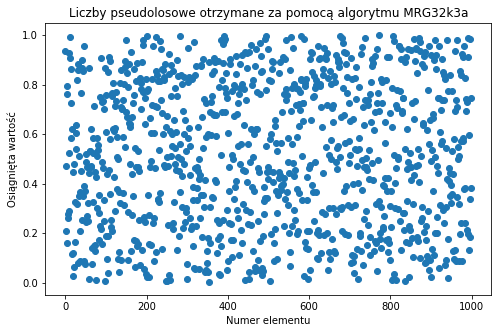

In [16]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

M_1 = 2**32 - 209 #stałe 
M_2 = 2**32 - 22853

##implementacja algorytmu MRG32k3a##
def MRG32k3a(k,SEED):
    
    X = np.empty(4, dtype = float) #tablice do przechowywania 
    Y = np.empty(4, dtype = float) #potrzebnych danych do wyliczenia U
    U = np.empty(k, dtype = float) #tablica na liczby pseudolosowe

    X[0:2] = SEED #ustalenie wartości ziarna
    Y[0:2] = SEED
    
    for i in range(k):
        X[3] = (1403580*X[1] - 810728*X[0]) % M_1 #wyliczenie odpowiednich X Y
        Y[3] = (527612*Y[2] - 1370589*Y[0]) % M_2 #zgodnie z algorytmem MRG32k3a

        if X[3]<=Y[3]:
             U[i] = (X[3] - Y[3] + M_1) / (1 + M_1) #wyliczenie Uk w zależności
        else:                                       #od spełnianego warunku
            U[i] = (X[3] - Y[3]) / (1 + M_1)

        X = np.roll(X, -1) #przesunięcie tablicy o jeden element w lewo
        Y = np.roll(Y, -1) #w celu przechowywania tylko potrzebnych wartości

    return U

fig = plt.figure(figsize=(8,5))

ax1 = fig.add_subplot(111)
ax1.plot(MRG32k3a(10**3,1),'o')
ax1.set_xlabel("Numer elementu")
ax1.set_ylabel("Osiągnięta wartość")
ax1.set_title("Liczby pseudolosowe otrzymane za pomocą algorytmu MRG32k3a")

Na pierwszy rzut oka można stwierdzić, że symulacja jest poprawna. Punkty przyjmują wartości z przedziału (0,1) i ich rozmieszczenie zdaje się być losowe. Podczas testowania algorytmu za każdym razem kropki rozmieszczały się troszkę inaczej.

Jednak należy jeszcze sprawdzić poprawność wykonanej wyżej symulacji poprzez porównanie histogramu estymującego gęstość otrzymanej próby z gęstością teoretyczą dla rozkładu jednostajnego $U(0,1)$.

Text(0, 0.5, 'Wartość gęstości')

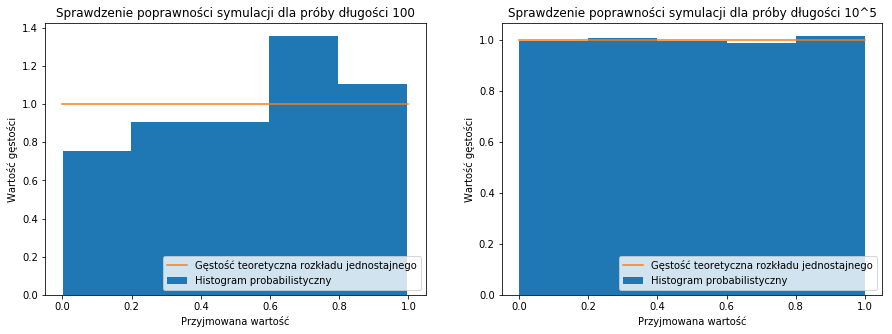

In [2]:
fig = plt.figure(figsize=(15,5))
ax2 = fig.add_subplot(121)
ax2.hist(MRG32k3a(10**2,1),density=True,bins =5, label = "Histogram probabilistyczny")
xs = np.linspace(0,1,20)
ax2.plot(xs,sp.uniform.pdf(xs),label = "Gęstość teoretyczna rozkładu jednostajnego")
ax2.set_title("Sprawdzenie poprawności symulacji dla próby długości 100")
ax2.legend(loc='lower right')
ax2.set_xlabel('Przyjmowana wartość')
ax2.set_ylabel('Wartość gęstości')
ax2 = fig.add_subplot(122)
ax2.hist(MRG32k3a(10**5,1),density=True,bins =5, label = "Histogram probabilistyczny")
xs = np.linspace(0,1,20)
ax2.plot(xs,sp.uniform.pdf(xs),label = "Gęstość teoretyczna rozkładu jednostajnego")
ax2.set_title("Sprawdzenie poprawności symulacji dla próby długości 10^5")
ax2.legend(loc='lower right')
ax2.set_xlabel('Przyjmowana wartość')
ax2.set_ylabel('Wartość gęstości')

Histogram estymujący gęstość powstałej próby pokrywa się z gęstością teoretyczną dla rozkładu $U(0,1)$. Pole pod wykresem gęstości jak i suma pól słupków tworzących histogram daje 1. Pierwszy histogram odpowiada symulacji widocznej na pierwszym wykrsie, natomiast drugi odpowiada próbie długości $10^{5}$. Widać, że dla dużych n słupki histogram tworzy prostokąt pod wykresem gęstości również o polu równym 1. Takie wyniki świadczą o tym, że symulacja działa poprawnie.

## Zadanie 2

Celem zadania było porównanie szybkości działania generowania rozkładu normalnego. Wykorzystując popularne metody generacji 
zmiennych losowych: metodę odwrotnej dystrybuanty i metodę akceptacji i odrzucenia. Do przeprowadzenia analizy wykorzystane zostały algorytmy implementujące działanie każdej z wymienionych metod.

In [27]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

##generowanie rozkładu normalnego metodą odwrotnej dystrybuanty##
def inverse_cdf(n,F,dx):
    X = np.empty(n) #pusta tablica na wartości
    for i in range(n):
        x = 0    #ustalenie punktu startowego
        U = np.random.rand(1) #losowa wartość 
        if F(0)<U:            #sprawdzenie po której stronie punktu startowego znajduje się 
            while F(x)<=U:    #aby w zależności od tego zwiększać lub zmniejszać deltę
                x += dx
        else:
            while F(x)>U:
                x -=dx
        X[i] = x   #dodanie elementu do tablicy
    return X

##generowanie rozkładu normalnego metodą akceptacji-odrzucenia##
def acceptance_rejection(n):
    j = 0
    X = np.empty(n) #tablica do przechowywania wartości
    c = 2*np.pi         #stała c potrzebna w algorytmie
    while j < n:    #pętla wykonuje się dopóki nie otrzymamy n wartości spełniających warunek
        Y = sp.expon.rvs(size = 1) #zmienna losowa o rozkładzie wykładniczym
        u2 = np.random.uniform(0.0,0.1,1) #losowa liczba 
        if u2 <= sp.norm.pdf(Y)/(c*sp.expon.pdf(Y)): #sprawdzenie warunku 
            
            p = np.random.uniform(0.0, 1.0, 1) # zmiana znaku z prawdopodobieństwem 1/2
            if p < (1 / 2):
                Y = - Y
                
            X[j] = Y #dodanie elementu do tablicy
            j += 1 #zwiększenie j w momencie znalezienia pasującej wartości
    return X


Text(0, 0.5, 'Wartość')

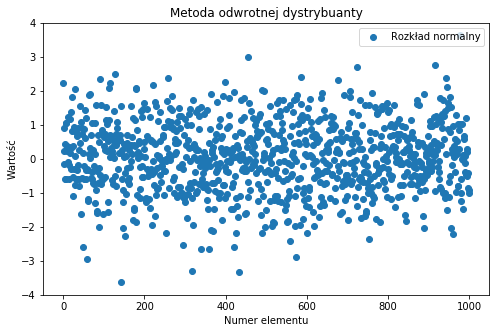

In [7]:
fig = plt.figure(figsize=(8,5))
ax3 = fig.add_subplot(111)
ax3.plot(inverse_cdf(1000,sp.norm.cdf,0.01),'o', label = "Rozkład normalny")
ax3.set_title("Metoda odwrotnej dystrybuanty")
ax3.legend(loc='upper right')
ax3.set_xlabel('Numer elementu')
ax3.set_ylabel('Wartość')

Wykres ten przedstawia próbę rozkładu normalnego powstałą przy wykorzystaniu metody odwrotnej dystrybuanty. Moża zauważyć, że przjmowane są wartości zarówno dodatnie i ujemne oraz największe zagęszczenie występuje na przedziale $(0,1)$. Co wstepnie świadczy o poprawności powstałej próby. Jednak należy sprawdzić, czy napewno tak jest.

Text(0, 0.5, 'Wartość')

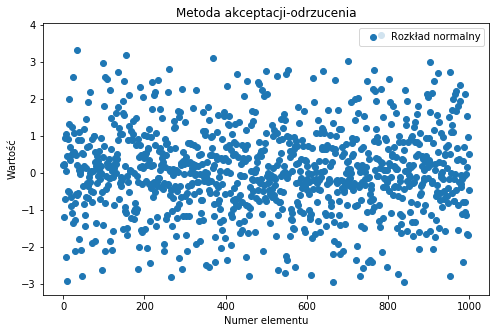

In [8]:
fig = plt.figure(figsize=(8,5))
ax4 = fig.add_subplot(111)
ax4.plot(acceptance_rejection(1000),'o', label = "Rozkład normalny")
ax4.set_title("Metoda akceptacji-odrzucenia")
ax4.legend(loc='upper right')
ax4.set_xlabel('Numer elementu')
ax4.set_ylabel('Wartość')

W przypadku generowania rozkładu normalnego metodą akceptacji-odrzucenia wnioski są podobne.

#### Sprawdzenie poprawności symulacji

Text(0, 0.5, 'Wartość gęstości')

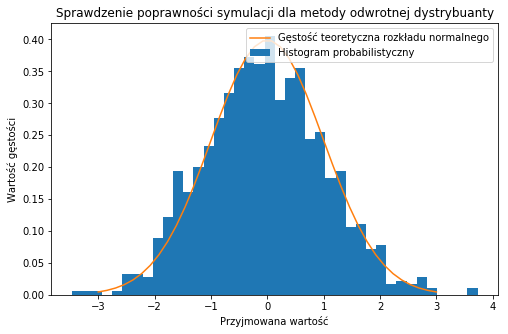

In [16]:
fig = plt.figure(figsize=(8,5))
ax5 = fig.add_subplot(111)
ax5.hist(inverse_cdf(10**3,sp.norm.cdf,0.01),bins =40 ,density = True, label = "Histogram probabilistyczny")
ax5.set_title("Sprawdzenie poprawności symulacji dla metody odwrotnej dystrybuanty")
xs = np.linspace(-3,3,40)
ax5.plot(xs,sp.norm.pdf(xs),label = "Gęstość teoretyczna rozkładu normalnego")
ax5.legend(loc='upper right')
ax5.set_xlabel('Przyjmowana wartość')
ax5.set_ylabel('Wartość gęstości')

W przypadku metody odwrotnej dystrybuanty, porównując histogram estymujący gęstość dla powstałej próby z gęstością teoretyczną rozkładu normalnego, można stwierdzić, że symulacja działa poprawnie.

Text(0, 0.5, 'Wartość gęstości')

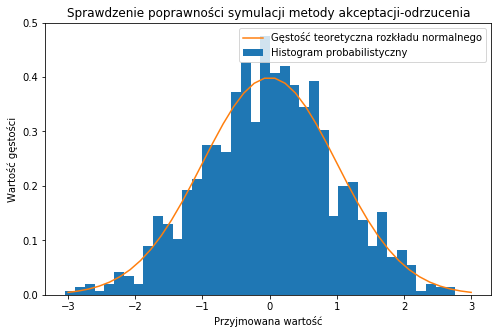

In [23]:
fig = plt.figure(figsize=(8,5))
ax6 = fig.add_subplot(111)
ax6.hist(acceptance_rejection(10**3),bins=40,density=True, label = "Histogram probabilistyczny")
ax6.set_title("Sprawdzenie poprawności symulacji metody akceptacji-odrzucenia")
xs = np.linspace(-3,3,40)
ax6.plot(xs,sp.norm.pdf(xs),label = "Gęstość teoretyczna rozkładu normalnego")
ax6.legend(loc='upper right')
ax6.set_xlabel('Przyjmowana wartość')
ax6.set_ylabel('Wartość gęstości')

Porównując histogram estymujący gęstość dla metody akceptacji-odrzucenia, z gęstością teoretyczną rozkładu normalnego, widać, że symulacja działa poprawnie. Widoczne są pewne odchylenia od rozkładu normalnego $N(0,1)$. Jednak jest to spowodowane doborem stałej c w zaimplementowanym algorytmie.

#### Testy normalności

Do przeprowadzenia testów normalności wykorzystany został test Kołmogorov'a-Smirnov'a.

In [28]:
X = inverse_cdf(1000,sp.norm.cdf,0.01)
sp.kstest(X,'norm')

KstestResult(statistic=0.01490208220476115, pvalue=0.9794334920785855)

Dla metody odwrotnej dystrybuanty widać, że pvalue = 0.98, a więc jest bardzo duże. Stąd można wyciągnąć wniosek, że praktycznie nie ma odchyleń od rozkładu normalnego standardowego.

In [30]:
X = acceptance_rejection(1000)
sp.kstest(X,'norm')

KstestResult(statistic=0.022860977392007542, pvalue=0.6728063554351755)

W przypadku metody akceptacji-odrzucenia pvalue = 0.67, a więc jest mniejsze niż w przypadku metody odwrotnej dystrybuanty,jednak dalej jest do wysoka wartość. Świadczy to tylko o niewielkich odchyleniach od rozkładu normalnego standardowego.(prawdopodobnie spowodowanych doborem stałej c)

#### Porównanie szybkości działania

In [35]:
from datetime import datetime 

start_time = datetime.now() 
inverse_cdf(1000,sp.norm.cdf,0.01)
time_elapsed1 = datetime.now() - start_time 

print('Czas wykonania metody odwrotnej dystrybuanty (hh:mm:ss.ms) {}'.format(time_elapsed1))

Czas wykonania metody odwrotnej dystrybuanty (hh:mm:ss.ms) 0:00:11.277437


In [36]:
from datetime import datetime 

start_time = datetime.now() 
acceptance_rejection(1000)
time_elapsed2 = datetime.now() - start_time 

print('Czas wykonania metody akceptacji-odrzucenia (hh:mm:ss.ms) {}'.format(time_elapsed2))

Czas wykonania metody akceptacji-odrzucenia (hh:mm:ss.ms) 0:00:00.659624


In [37]:
print(time_elapsed1/time_elapsed2)

17.096765733205583


Porównując otrzymane wyniki, widać, że dla powyższej implementacji metoda akceptacji-odrzucenia działa znacznie sprawniej niż metoda odwrotnej dystrybuanty. Jest ona prawie 17 razy szybsza, co odgrywa znaczącą rolę podczas gdy rozmiar generowanej próby jest bardzo duży.

## Zadanie 3

Celem zadania było wygenerowanie rozkładu Poissona, korzystając z metody odwrotnej dystrybuanty, którą należało zaimplementować dla przypadku dyskretnego.

In [6]:
import numpy as np

##generowanie rozkładu poissona metodą odwrotnej dystrybuanty##
def PoissonDistributionGenerator(n, lamb):
    results = np.empty(n)    #tablica na wyniki
    j = 0                    #licznik elementów generowanej próby
    while j<n:
        i = 0
        p = np.exp(-lamb)    #P(X=i) 
        u = np.random.rand()    #losowa wartość
        F = p                #odwrócona dystrybuanta
        while u>F:           #taki warunek ze względu na brak wartości ujemnych
            p = p*lamb/(i+1) #wzór na p_{i+1} uzależnione od p_{i}
            F += p           #zwiększ wartość F o p 
            i +=1            #zwiększaj i do momentu znalezienia ostatniego pasujacego elementu
        results[j] = i       #dodanie elementu do tablicy 
        j +=1                #po znalezieniu pasującego elementu zwiększ licznik o 1
    return results           #zwraca wygenerowaną próbę



Text(0.5, 1.0, 'Rozkład Poissona dla $ \\lambda $ = 6')

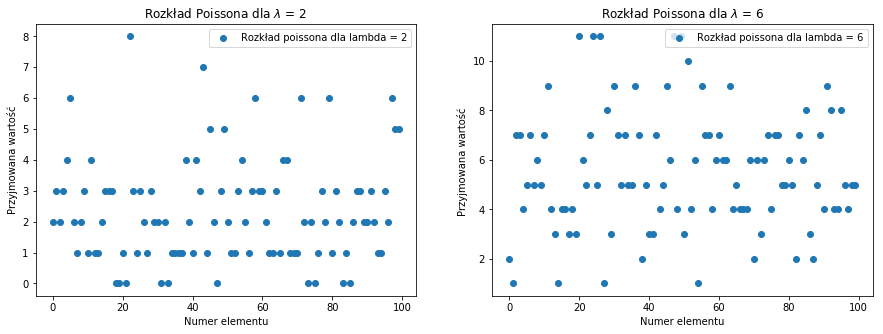

In [15]:
fig = plt.figure(figsize=(15,5))
ax7 = fig.add_subplot(121)
ax7.plot(PoissonDistributionGenerator(10**2,2),'o',label = "Rozkład poissona dla lambda = 2")
ax7.legend(loc='upper right')
ax7.set_xlabel('Numer elementu')
ax7.set_ylabel('Przyjmowana wartość')
ax7.set_title("Rozkład Poissona dla $ \lambda $ = 2")
ax8 = fig.add_subplot(122)
ax8.plot(PoissonDistributionGenerator(10**2,6),'o',label = "Rozkład poissona dla lambda = 6")
ax8.legend(loc='upper right')
ax8.set_xlabel('Numer elementu')
ax8.set_ylabel('Przyjmowana wartość ')
ax8.set_title("Rozkład Poissona dla $ \lambda $ = 6")

Otrzymane wykresy przedstawiają próbę o rozkładzie Poissona dla różnych $ \lambda $. Widać, że wartości ujemne nie są przyjmowane oraz punkty tworzą kreski na wysokości liczb całkowitych (przyjmuja tylko całkowie wartości), co jest charakterystyczne dla rozkładu Poissona. Można wnioskować, że symulacja została wykonana poprawnie. Jednak zostanie poddana dokładniejszemu sprawdzeniu.

Text(0.5, 1.0, 'Histogram estymujący dystrybuantę rozkładu Poissona dla $ \\lambda $ = 6')

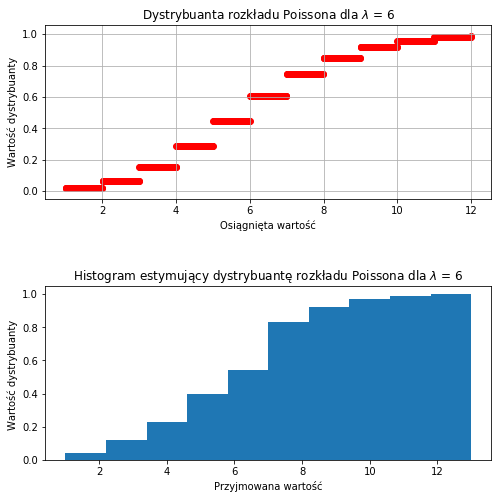

In [9]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace = 0.5)
ax7 = fig.add_subplot(211)
xs = np.linspace(1, 12, 1000)
ax7.scatter(xs, sp.poisson.cdf(xs,6), c="red")
ax7.grid(True)
ax7.set_xlabel('Osiągnięta wartość')
ax7.set_ylabel('Wartość dystrybuanty')
ax7.set_title("Dystrybuanta rozkładu Poissona dla $ \lambda $ = 6")
ax8 = fig.add_subplot(212)
ax8.hist(PoissonDistributionGenerator(10**2,6),density=True,cumulative=True)
ax8.set_xlabel('Przyjmowana wartość')
ax8.set_ylabel('Wartość dystrybuanty ')
ax8.set_title("Histogram estymujący dystrybuantę rozkładu Poissona dla $ \lambda $ = 6")


Patrząc na dystrybuantę teoretyczną rozkładu Poissona dla $\lambda = 6$ i histogram estymując dystrybuantę tego rozkładu widać, że wykresy się ze sobą pokrywają, a więc symulacja działa poprawnie.

## Zadanie 4

Zadanie polegało na wyznaczeniu przybliżenia całki $ \int_{0}^{\infty}{x^{\alpha - 1}e ^{-x}dx}$ metodą Monte Carlo. Należało także sprawdzić jak stała C zależy od $\alpha $.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import *


##przybliżenie całki metodą Monte Carlo##
def integral_estimation(n, alpha):
    x = np.random.exponential(1, n)  # zmienne z rozkładu wykładniczego
    X = x ** (alpha - 1)  # wzór na X
    estimation = np.mean(X)  # średnia z wyliczonego X
    return estimation  # zwróć przybliżoną wartość


##uśrednienie wartości wygenerowanych metodą Monte Carlo##
def avarage_value(alpha):
    estimation_results = np.empty(50)  # tablica na wyniki
    for i in range(50):  # powtarzamy wyznaczanie 50 razy dla wyeliminowania wahań
        estimation_results[i] = integral_estimation(10 ** 4, alpha)
    estimated_value = np.mean(estimation_results)  # średnia z wyników
    return estimated_value  # zwróć uśrednioną wartość


##wyznaczenie stałej C ##
def value_C(n, alpha):
    results_I = np.empty(n)  # tablicena wyniki
    results_c = np.empty(n)
    results_var = np.empty(n)
    for i in range(1, n):
        results_I[i] = avarage_value(alpha)  # liczenie przybliżonych wartości całki
        results_c[i] = np.var(results_I[0:i]) * i  # obliczanie wartości C
        results_var[i] = results_c[i] / i  # obliczenie wariancji
    return results_c, results_var  # zwróć tablicę z wartościami C i wariancji


#### Przybliżenie całki metodą Monte Carlo

In [25]:
print("Przybliżona wartość całki dla alpha = 4 :",avarage_value(4))


Przybliżona wartość całki dla alpha = 4 : 6.002936225321348


Wiemy, że przybliżana całka to tak zwana funkcja gamma. Dla sprawdzenia poprawności powyższego przybliżenia warto sprawdzić wartość tej funkcji dla $ \alpha = 4 $.

In [26]:
import scipy.special as spp
print("Wartość funkcji gamma dla alpha = 4 : ",spp.gamma(4))

Wartość funkcji gamma dla alpha = 4 :  6.0


Widzimy, że wartości są prawie równe a więc całka została poprawnie przybliżona metodą Monte Carlo.

#### Sprawdzenie poprawności wyznaczenia stałej C

Teraz należy sprawdzić poprawność wyznaczenia stałej C. Najlepiej zrobić to porównując wykres $ Var(I_{n})$ z wykresem $\frac{C}{n}$. Jeśli dla dużych n wykresy będą się ze sobą pokrywać, potwierdzi to poprawność działania.

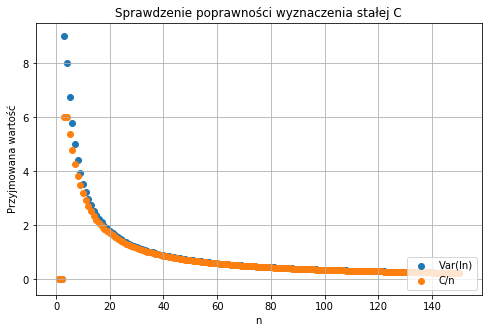

In [2]:
fig = plt.figure(figsize=(8,5))
ax9 = fig.add_subplot(111)
xs = np.arange(1,151,1)
ax9.scatter(xs,value_C(150,4)[1],label="Var(In)")
ax9.scatter(xs,value_C(150,4)[0]/xs,label= "C/n")
ax9.grid(True)
ax9.set_xlabel('n')
ax9.set_ylabel('Przyjmowana wartość')
ax9.set_title("Sprawdzenie poprawności wyznaczenia stałej C")
ax9.legend(loc='lower right')


Widzimy, że wykresy dokładnie pokrywają się ze sobą, a co za tym dzie wartośc C została wyznaczona poprawnie.

#### Sprawdzenie zależności między C i $ \alpha $

[1. 2. 3. 4. 5.]


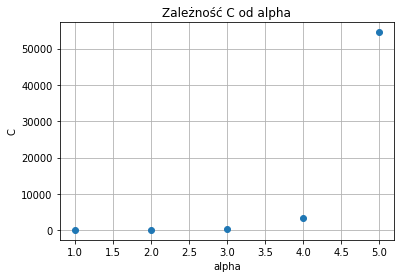

In [5]:
n = 10 ** 2
alpha = np.arange(1, 6, 1)
C = np.empty(5)
print(C)

for i in range(len(alpha)):
    c = value_C(n, alpha[i])
    C[i] = np.mean(c[0]) * n

plt.plot(alpha, C, 'o')
plt.xlabel("alpha")
plt.ylabel("C")
plt.title("Zależność C od alpha")
plt.grid(True)

Text(0.5, 1.0, 'Zależność C od alpha w skali logarytmicznej')

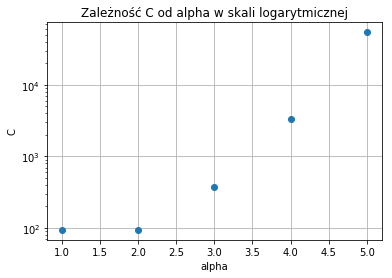

In [6]:
plt.yscale("log")
plt.plot(alpha,C,'o')
plt.grid(True)
plt.xlabel("alpha")
plt.ylabel("C")
plt.title("Zależność C od alpha w skali logarytmicznej")


Patrząc na wykresy zależności stałej C od $ \alpha $ widać, że wartość stałej wzrasta logarytmicznie wraz ze wzrostem $ \alpha $.

## Zadanie 5

Celem zadania było wygenerowanie rozkładu chi kwadrat dla jednego, dwóch i trzech stopni swobody. Do tego celu należało wykorzystać popularne metody generowania rozkładu normalnego: metodę Boxa-Mullera i metodę Marsagli.

In [34]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import *

##metoda Boxa-Mullera ##
def box_muller(n):
    E = np.random.exponential(1, n)        #liczby losowe z rozkładu wykładniczego
    theta = np.random.uniform(0,2*np.pi,n) #kąt

    X = np.sqrt(2*E)*np.cos(theta)         #niezależne zmienne losowe
    Y = np.sqrt(2*E)*np.sin(theta)         #o rozkładzie normalnym
    
    return X,Y 

##metoda Marsaglii ##
def marsaglii(n):
    U = np.random.uniform(-1,1,n) #wartości losowe z przedziału (-1,1)
    V = np.random.uniform(-1,1,n)
    S = U**2 + V**2              #warunek aby mieściły się na kole
    F = S > 1
    c = np.count_nonzero(F)     #zlicz niezerowe wartości
    
    while c>0:  #pętla powtarza się dopóki c się nie wyzeruje
        U[F] = np.random.uniform(-1,1,c)
        V[F] = np.random.uniform(-1,1,c)
        S[F] = U[F]**2 + V[F]**2
        F[F] = S[F] > 1
        c = np.count_nonzero(F)
    
    W = np.sqrt(-2*np.log(S)/S)
    U *= W        #niezależne zmienne losowe
    V *= W        #o rozkładzie normalnym
    return U,V

##rozkład chi kwadrat##
def chi_squared(k,n,function):
    Y = function(n)
    if k == 1:      #dla jednego stopnia swobody
        X = (Y[0])**2
    elif k == 2:    #dla dwóch stopni swobody
        X = (Y[0])**2 + (Y[1])**2
    elif k == 3:    #dla trzech stopni swobody
        X = (Y[0])**2 + (Y[1])**2 + (function(n)[0])**2

    return X


#### Metoda Marsaglii

Generujemy rozkład chi kwadrat dla jednego, dwóch i trzech stopni swobody metodą Marsaglii.

Text(0.5, 1.0, 'Rozkład chi kwadrat o trzech stopniach swobody')

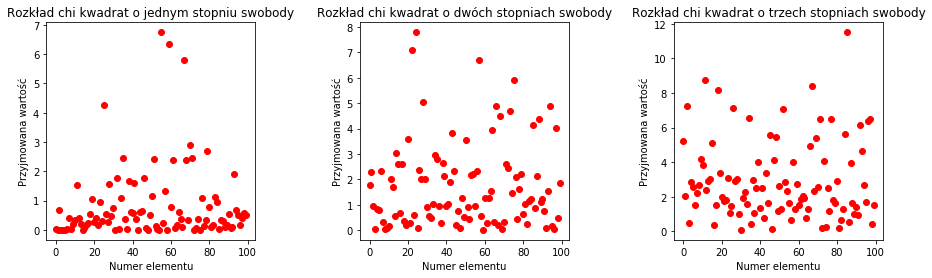

In [35]:
fig = plt.figure(figsize=(15,4))
fig.subplots_adjust(wspace = 0.5)
ax7 = fig.add_subplot(131)
ax7.plot(chi_squared(1,10**2,marsaglii),'o', c="red")
ax7.set_xlabel('Numer elementu')
ax7.set_ylabel('Przyjmowana wartość')
ax7.set_title("Rozkład chi kwadrat o jednym stopniu swobody")
ax8 = fig.add_subplot(132)
ax8.plot(chi_squared(2,10**2,marsaglii),'o', c="red")
ax8.set_xlabel('Numer elementu')
ax8.set_ylabel('Przyjmowana wartość')
ax8.set_title("Rozkład chi kwadrat o dwóch stopniach swobody")
ax9 = fig.add_subplot(133)
ax9.plot(chi_squared(3,10**2,marsaglii),'o', c="red")
ax9.set_xlabel('Numer elementu')
ax9.set_ylabel('Przyjmowana wartość')
ax9.set_title("Rozkład chi kwadrat o trzech stopniach swobody")


Na pierwszy rzut oka wydaje się,że rozkład został poprawnie wygenerowany, ponieważ nie przyjmuje wartości ujemnych, co jest cechą rozkładu chi kwadrat.Należy jednak sprawdzić, czy rozkład został poprawnie wygenerowany. Do tego celu można wykorzystać histogram estymujący gęstość z gęstością teoretyczną dla rozkładu.

Text(0.5, 1.0, 'Rozkład chi kwadrat o trzech stopniach swobody')

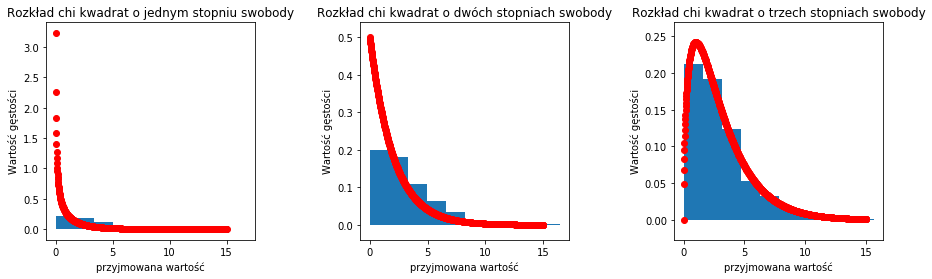

In [37]:
fig = plt.figure(figsize=(15,4))
fig.subplots_adjust(wspace = 0.5)
ax7 = fig.add_subplot(131)
xs = np.linspace(0, 15, 1000)
ax7.scatter(xs,chi2.pdf(xs,1), c="red", label="teoretyczna gęstość",zorder = 2)
ax7.hist(chi_squared(3,10**3,marsaglii),bins = 10,density=True,zorder = 1)
ax7.set_xlabel('przyjmowana wartość')
ax7.set_ylabel('Wartość gęstości')
ax7.set_title("Rozkład chi kwadrat o jednym stopniu swobody")
ax8 = fig.add_subplot(132)
ax8.scatter(xs,chi2.pdf(xs,2), c="red", label="teoretyczna gęstość",zorder = 2)
ax8.hist(chi_squared(3,10**3,marsaglii),bins = 10,density=True,zorder = 1)
ax8.set_xlabel('przyjmowana wartość')
ax8.set_ylabel('Wartość gęstości')
ax8.set_title("Rozkład chi kwadrat o dwóch stopniach swobody")
ax9 = fig.add_subplot(133)
ax9.scatter(xs,chi2.pdf(xs,3), c="red", label="teoretyczna gęstość",zorder = 2)
ax9.hist(chi_squared(3,10**3,marsaglii),bins = 10,density=True,zorder = 1)
ax9.set_xlabel('przyjmowana wartość')
ax9.set_ylabel('Wartość gęstości')
ax9.set_title("Rozkład chi kwadrat o trzech stopniach swobody")


Widać, że dla wygenerowanych prób histogram estymujący gęstość pokrywa się z gęstością teoretyczną. Świadczy to o poprawności wykonanej symulacji.

#### Metoda Boxa-Mullera

Teraz generujemy rozkład chi kwadrat dla jednego, dwóch i trzech stopni swobody metodą Boxa Mullera.

Text(0.5, 1.0, 'Rozkład chi kwadrat o trzech stopniach swobody')

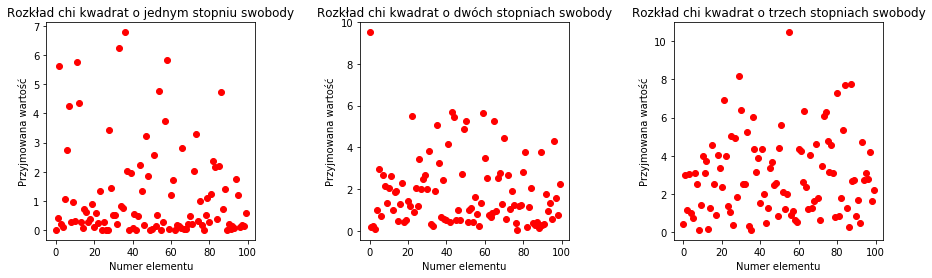

In [41]:
fig = plt.figure(figsize=(15,4))
fig.subplots_adjust(wspace = 0.5)
ax7 = fig.add_subplot(131)
ax7.plot(chi_squared(1,10**2,box_muller),'o', c="red")
ax7.set_xlabel('Numer elementu')
ax7.set_ylabel('Przyjmowana wartość')
ax7.set_title("Rozkład chi kwadrat o jednym stopniu swobody")
ax8 = fig.add_subplot(132)
ax8.plot(chi_squared(2,10**2,box_muller),'o', c="red")
ax8.set_xlabel('Numer elementu')
ax8.set_ylabel('Przyjmowana wartość')
ax8.set_title("Rozkład chi kwadrat o dwóch stopniach swobody")
ax9 = fig.add_subplot(133)
ax9.plot(chi_squared(3,10**2,box_muller),'o', c="red")
ax9.set_xlabel('Numer elementu')
ax9.set_ylabel('Przyjmowana wartość')
ax9.set_title("Rozkład chi kwadrat o trzech stopniach swobody")

Na pierwszy rzut oka rozkład został poprawnie wygenerowany, ponieważ nie przyjmuje wartości ujemnych, co jest cechą rozkładu chi kwadrat. Należy jednak sprawdzić poprawność wygenerowanych rozkładów.

Text(0.5, 1.0, 'Rozkład chi kwadrat o trzech stopniach swobody')

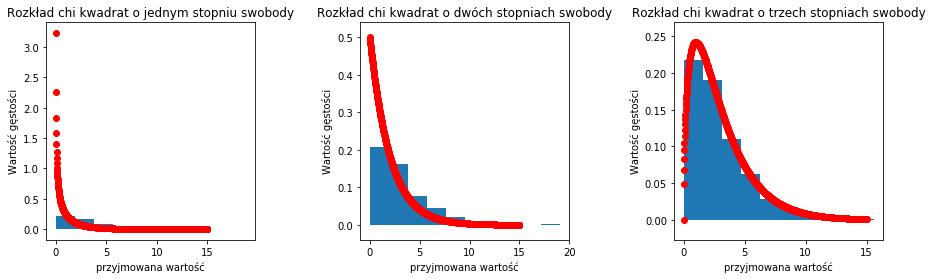

In [22]:
fig = plt.figure(figsize=(15,4))
fig.subplots_adjust(wspace = 0.5)
ax7 = fig.add_subplot(131)
xs = np.linspace(0, 15, 1000)
ax7.scatter(xs,chi2.pdf(xs,1), c="red", label="teoretyczna gęstość",zorder = 2)
ax7.hist(chi_squared(3,10**3,box_muller),bins = 10,density=True,zorder = 1)
ax7.set_xlabel('przyjmowana wartość')
ax7.set_ylabel('Wartość gęstości')
ax7.set_title("Rozkład chi kwadrat o jednym stopniu swobody")
ax8 = fig.add_subplot(132)
ax8.scatter(xs,chi2.pdf(xs,2), c="red", label="teoretyczna gęstość",zorder = 2)
ax8.hist(chi_squared(3,10**3,box_muller),bins = 10,density=True,zorder = 1)
ax8.set_xlabel('przyjmowana wartość')
ax8.set_ylabel('Wartość gęstości')
ax8.set_title("Rozkład chi kwadrat o dwóch stopniach swobody")
ax9 = fig.add_subplot(133)
ax9.scatter(xs,chi2.pdf(xs,3), c="red", label="teoretyczna gęstość",zorder = 2)
ax9.hist(chi_squared(3,10**3,box_muller),bins = 10,density=True,zorder = 1)
ax9.set_xlabel('przyjmowana wartość')
ax9.set_ylabel('Wartość gęstości')
ax9.set_title("Rozkład chi kwadrat o trzech stopniach swobody")

Widać, że dla wygenerowanych prób histogram estymujący gęstość pokrywa się z gęstością teoretyczną. Świadczy to o poprawności wykonanej symulacji.

## Zadanie 6

Zadanie polegało na wyznaczeniu rozkładów normalnych 2D i 3D, należało następnie sprawdzić poprawność otrzymanych wyników.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import *

## generowanie rozkladu normalnego 2D ##
def normal_2d(n,p):
    Z = np.random.normal(0,1, [2 , n]) #2 rozkładny normalne
    E = np.array([[1 , p] , [p , 1]])  # macierz kowariancji
    A = np.linalg.cholesky(E)          #dekompozycja cholesky'ego
    X = A @ Z                          #rozkład normalny 2D
    
    return X

## generowanie rozkładu normalnego 3D ##
def normal_3d(n,p12,p13,p23):
    Z = np.random.normal(0,1,[3, n])         # 3 rozkłady normalne
    E =[[1,p12,p13],[p12,1,p23],[p13,p23,1]] #macierz kowariancji
    A = np.linalg.cholesky(E)                #dekompozycja cholesky'ego
    X = A @ Z                                #rozkład 3D
    
    return X
    
    


#### Rozkład normalny 2D

Text(0.5, 1.0, ' rho = 0.99  ')

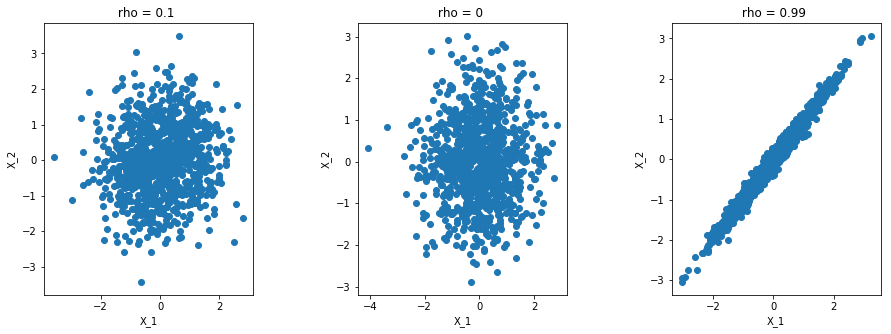

In [19]:
function = normal_2d(10**3,0.1)
fig = plt.figure(figsize = (15,5))
fig.subplots_adjust(wspace = 0.5 )
ax1 = fig.add_subplot(131)
ax1.scatter(function[0], function[1])
ax1.set_xlabel('X_1')
ax1.set_ylabel('X_2')
ax1.set_title(" rho = 0.1  ")

function1 = normal_2d(10**3,0)
ax2 = fig.add_subplot(132)
ax2.scatter(function1[0], function1[1])
ax2.set_xlabel('X_1')
ax2.set_ylabel('X_2')
ax2.set_title(" rho = 0  ")

function2 = normal_2d(10**3,0.99)
ax3 = fig.add_subplot(133)
ax3.scatter(function2[0], function2[1])
ax3.set_xlabel('X_1')
ax3.set_ylabel('X_2')
ax3.set_title(" rho = 0.99  ")

Widać, że im bliżej |$ \rho $| jest jedynki tym rozkład kształtem przypomina elpisę. Im bliżej zera - koło. Dla sprawdzenia poprawności powyższej symulacji warto sprawdzić czy rozkłady brzegowe pokrywają się z gęstością teoretyczną rozkładu normalnego. Takie sprawdzenie zostanie wykonane dla jednego przypadku wartości |$ \rho $|(|$ \rho $|=0.1), ponieważ wszystkie były generowane tą samą metodą.

Text(0, 0.5, 'Wartość gęstości')

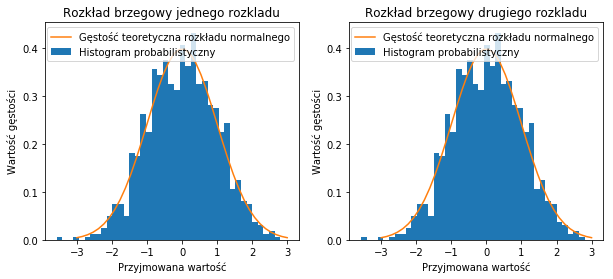

In [23]:
fig = plt.figure(figsize=(10,4))
ax5 = fig.add_subplot(121)
ax5.hist(function[0],bins =40 ,density = True, label = "Histogram probabilistyczny")
ax5.set_title("Rozkład brzegowy jednego rozkladu")
xs = np.linspace(-3,3,40)
ax5.plot(xs,norm.pdf(xs),label = "Gęstość teoretyczna rozkładu normalnego")
ax5.legend(loc='upper right')
ax5.set_xlabel('Przyjmowana wartość')
ax5.set_ylabel('Wartość gęstości')
ax5 = fig.add_subplot(122)
ax5.hist(function[0],bins =40 ,density = True, label = "Histogram probabilistyczny")
ax5.set_title("Rozkład brzegowy drugiego rozkladu")
xs = np.linspace(-3,3,40)
ax5.plot(xs,norm.pdf(xs),label = "Gęstość teoretyczna rozkładu normalnego")
ax5.legend(loc='upper right')
ax5.set_xlabel('Przyjmowana wartość')
ax5.set_ylabel('Wartość gęstości')

Widać, że rozkłady brzegowe pokrywają się z gęstością teoretyczną, a więc symulacja działa poprawnie.

#### Rozkład normalny 3D

Text(0.5, 0.92, 'Rozkład 3D o korelacjach p12=-0.4, p13=-0.1, p23=-0.7')

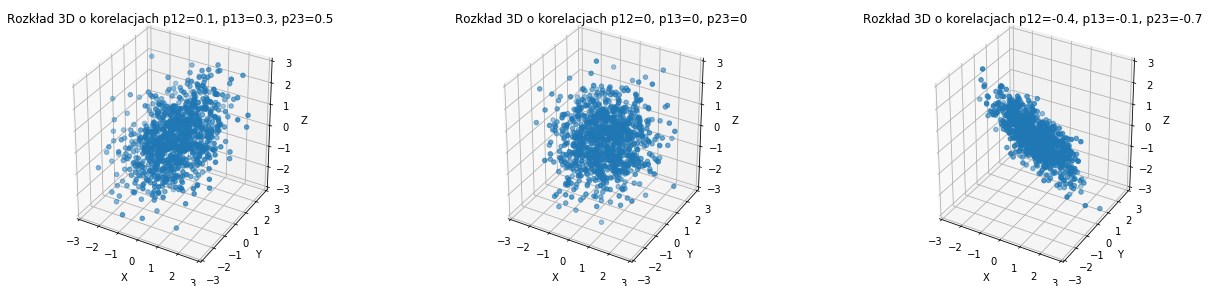

In [20]:

import matplotlib.pyplot as plt

function22 = normal_3d(10**3,0.1,0.3,0.5)
fig = plt.figure(figsize=(20,5))
fig.subplots_adjust(wspace = 0.7 )
ax = fig.add_subplot(131, projection='3d')
ax.scatter3D(function22[0],function22[1],function22[2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_zlim(-3,3)
ax.set_title('Rozkład 3D o korelacjach p12=0.1, p13=0.3, p23=0.5')
function11 = normal_3d(10**3,0,0,0)
ax1 = fig.add_subplot(132, projection='3d')
ax1.scatter3D(function11[0],function11[1],function11[2])
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_xlim(-3,3)
ax1.set_ylim(-3,3)
ax1.set_zlim(-3,3)
ax1.set_title('Rozkład 3D o korelacjach p12=0, p13=0, p23=0')
function33 = normal_3d(10**3,-0.4,-0.1,-0.7)
ax2 = fig.add_subplot(133, projection='3d')
ax2.scatter3D(function33[0],function33[1],function33[2])
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_xlim(-3,3)
ax2.set_ylim(-3,3)
ax2.set_zlim(-3,3)
ax2.set_title('Rozkład 3D o korelacjach p12=-0.4, p13=-0.1, p23=-0.7')

Powyższe wykresy przedstawiają rozkład normalny 3D dla kowariancji dodatnio zależnej, zerowej i ujemnie zależnej. Widać, że wykresy tworzą chmurki punktów. Dla współczynników zerowych chmurka przybiera kształt kuli. Dla dodatnich jest rozciągnięta po prawym skosie, dla ujemnych po lewym. Dla rozkładów 3D rozkłady brzegowe będą miały postać rozkładów normalnch 2D. Dla sprawdzenia poprawności symulacji przeanalizowany zostanie jeden przypadek(pierwszy dla współczynników dodatnich).

Text(0.5, 1.0, ' Rozkład brzegowy Y i Z ')

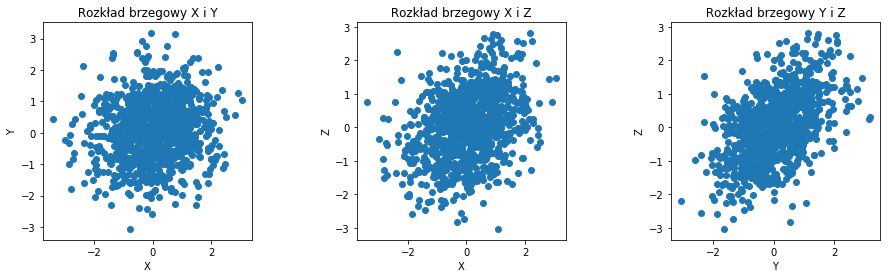

In [23]:
fig = plt.figure(figsize = (15,4))
fig.subplots_adjust(wspace = 0.5 )
ax1 = fig.add_subplot(131)
ax1.scatter(function22[0], function22[1])
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title(" Rozkład brzegowy X i Y ")

ax2 = fig.add_subplot(132)
ax2.scatter(function22[0], function22[2])
ax2.set_xlabel('X')
ax2.set_ylabel('Z')
ax2.set_title(" Rozkład brzegowy X i Z ")

ax3 = fig.add_subplot(133)
ax3.scatter(function22[1], function22[2])
ax3.set_xlabel('Y')
ax3.set_ylabel('Z')
ax3.set_title(" Rozkład brzegowy Y i Z ")

Dla sprawdzenia poprawności symulacji warto narysować histogramy estymujące gęstość dla jednego rozkładu brzegowego.

Text(0, 0.5, 'Wartość gęstości')

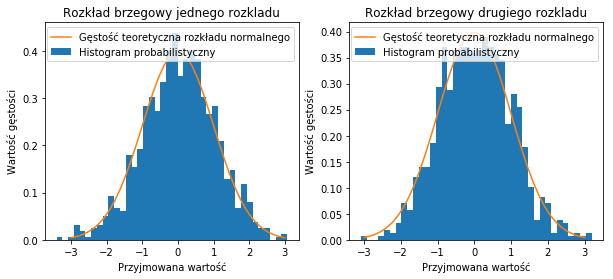

In [24]:
fig = plt.figure(figsize=(10,4))
ax5 = fig.add_subplot(121)
ax5.hist(function22[0],bins =40 ,density = True, label = "Histogram probabilistyczny")
ax5.set_title("Rozkład brzegowy jednego rozkladu")
xs = np.linspace(-3,3,40)
ax5.plot(xs,norm.pdf(xs),label = "Gęstość teoretyczna rozkładu normalnego")
ax5.legend(loc='upper right')
ax5.set_xlabel('Przyjmowana wartość')
ax5.set_ylabel('Wartość gęstości')
ax5 = fig.add_subplot(122)
ax5.hist(function22[1],bins =40 ,density = True, label = "Histogram probabilistyczny")
ax5.set_title("Rozkład brzegowy drugiego rozkladu")
xs = np.linspace(-3,3,40)
ax5.plot(xs,norm.pdf(xs),label = "Gęstość teoretyczna rozkładu normalnego")
ax5.legend(loc='upper right')
ax5.set_xlabel('Przyjmowana wartość')
ax5.set_ylabel('Wartość gęstości')

Histogramy estymujące gęstość dla X i Y pokrywają się z gęstością teoretyczną co świadczy o poprawności wyonania symulacji.